In [1]:
import numpy as np

# Existing data

We randomly generated data with shapes (100, 3).
Assume these are 100 samples from 3 groups.
Each sample has a value (float) stored in "data.npy" and a name (string) stored in "names.npy".

In one group, there were fewer samples, and the matrices have been filled with NaNs (data) and empty strings (names).

The NaNs and respective names (see above) are to be ignored in all tasks.
For example, you can use "np.nanmean" instead of "np.mean" to automatically ignore NaNs

In [2]:
%run ../create_dataset.py

In [3]:
# Load data
dat = np.load('data.npy')
nam = np.load('names.npy')

print the shapes and data types of both arrays

In [4]:
print(dat.shape, nam.shape)
print(dat.dtype, nam.dtype)

(100, 3) (100, 3)
float64 <U10


compute the means of all 3 groups, ignore NaNs

In [5]:
print(np.nanmean(dat, axis=0))

[3.47492401 3.26197478 5.00776356]


compute the means of all 3 groups, but ignore the first 10 and last 10 samples of each group

In [6]:
# All of these solutions give the same result

# These are some basic indexing approaches
print(np.nanmean(dat[10:-10], axis=0))
print(np.nanmean(dat[10:90], axis=0))
print(np.mean(dat[10:90], axis=0))
print(np.mean(dat[10:90, :], axis=0))

# You could also loop through the groups, but this is less efficient and often harder to read:
group_means = []
for i in range(3):
    group = dat[:, i]
    group_mean = np.nanmean(group[10:-10])
    group_means.append(group_mean)

print(np.array(group_means))

# A better way of looping would be this
group_means = []
for group in dat.T:  # Here we need to transpose the array with .T to have the groups being the first and not second axis
    group_mean = np.nanmean(group[10:-10])
    group_means.append(group_mean)

print(np.array(group_means))

[3.44301436 3.37304391 5.13376312]
[3.44301436 3.37304391 5.13376312]
[3.44301436 3.37304391 5.13376312]
[3.44301436 3.37304391 5.13376312]
[3.44301436 3.37304391 5.13376312]
[3.44301436 3.37304391 5.13376312]


compute the standard deviations and standard errors of all 3 groups

In [7]:
print(np.nanstd(dat, axis=0))
print(np.nanstd(dat, axis=0) / np.sum(np.isfinite(dat), axis=0))

[1.00901517 1.13680361 3.38084201]
[0.01009015 0.01136804 0.03756491]


find the maximum for each group, and the maximum value across all groups

In [8]:
print(np.nanmax(dat, axis=0))
print(np.nanmax(dat))

[ 6.05934755  5.01575281 16.55819447]
16.558194471964164


create a new array with the same shape and sorted values of each group in descending order (NaNs, come last).

optional: sort the names of each group respectively

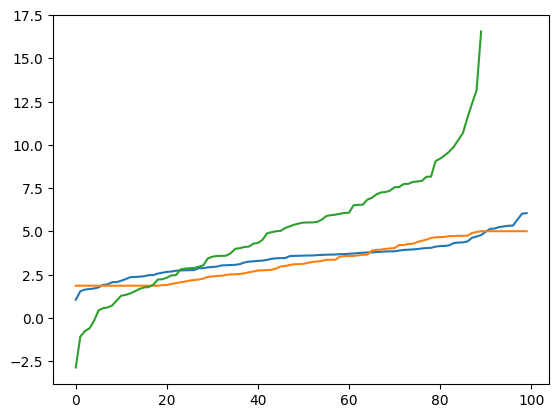

In [9]:
from matplotlib import pyplot as plt

dat_sorted = np.sort(dat, axis=0)

plt.plot(dat_sorted)
plt.show()

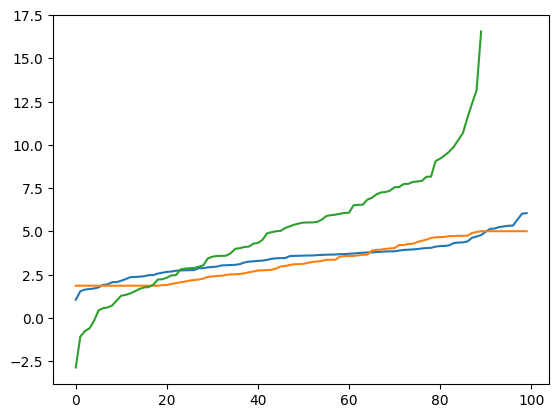

In [10]:
# again you can alternative loop through the groups. You can create a dummy table (to allocate memory) and fill it with the values you want
dat_sorted_alternative = np.zeros(shape=dat.shape)

for i in range(3):
    group = dat[:, i]
    group_sorted = np.sort(group)
    dat_sorted_alternative[:, i] = group_sorted

plt.plot(dat_sorted_alternative)
plt.show()

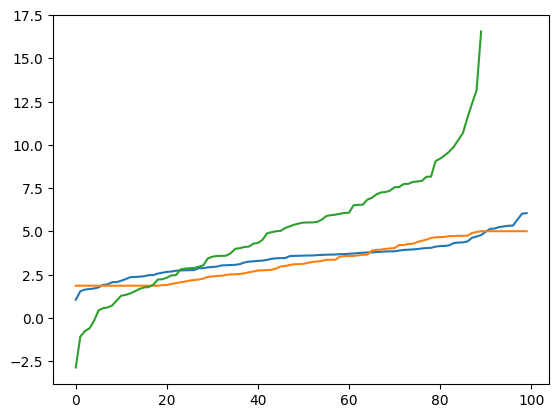

In [11]:
# if we want to solve the optional task, we have to get the indexes that would sort the array
sort_idx = np.argsort(dat, axis=0)
dat_sorted_alt = np.take_along_axis(dat, sort_idx, axis=0)  # This gives the same result as calling np.sort(dat, axis=1)
nam_sorted_alt = np.take_along_axis(dat, sort_idx, axis=0)
plt.plot(dat_sorted_alt);

find the name of the sample with the largest value

In [12]:
# This is an elegant way to do it, but unravel_index is not very intuitive
print(nam[np.unravel_index(np.nanargmax(dat), dat.shape)])

akctwzdrwf


In [13]:
# An easier way would be to flatten the array (i.e. make it 1d)
dat_flat = dat.flatten()
idx_of_largest_value = np.nanargmax(dat_flat)

# No we also need to flatten the names to be able to apply the array (without unraveling)
nam_flat = nam.flatten()
print(nam_flat[idx_of_largest_value]) # This gives the same value

akctwzdrwf


for the first group, find all values smaller than 3

In [14]:
# in one line
print(dat[:, 0][dat[:, 0] < 3])

[2.66489884 2.25222798 2.68643754 2.61753526 2.0756076  2.47605891
 2.8787492  2.9707586  2.76501258 1.91339866 2.56546273 2.37037478
 2.94835993 2.93009726 1.94554452 1.67486179 2.15470677 2.73570577
 2.07020941 1.76892879 2.36167098 1.5450703  1.70275947 2.41284671
 2.48148311 2.38938589 2.77011544 2.75890823 1.6422777  2.87846908
 1.0528279  2.7483345 ]


In [15]:
# or more readable, but with same result
group1 = dat[:, 0]
small_values = group1[dat[:, 0] < 3]
print(small_values)

[2.66489884 2.25222798 2.68643754 2.61753526 2.0756076  2.47605891
 2.8787492  2.9707586  2.76501258 1.91339866 2.56546273 2.37037478
 2.94835993 2.93009726 1.94554452 1.67486179 2.15470677 2.73570577
 2.07020941 1.76892879 2.36167098 1.5450703  1.70275947 2.41284671
 2.48148311 2.38938589 2.77011544 2.75890823 1.6422777  2.87846908
 1.0528279  2.7483345 ]


for all groups, find all names that start with an a. put them all in a single array

In [16]:
# in one line
res = np.array([n for n in nam.flat if n.startswith('a')])
print(res)

['atgdfyaewa' 'abaaimamtz' 'aglquzxted' 'aczhdpwjln' 'aiypmiumik'
 'awreoqclba' 'awrmbiubyi' 'akctwzdrwf' 'ajrzhukwbh' 'amsxcxqetu']


In [17]:
# The same with more lines of code:
res = []
for n in nam.flat:
    if n.startswith('a'):
        res.append(n)

res = np.array(res)  # Let's make an array from the list
print(res)

['atgdfyaewa' 'abaaimamtz' 'aglquzxted' 'aczhdpwjln' 'aiypmiumik'
 'awreoqclba' 'awrmbiubyi' 'akctwzdrwf' 'ajrzhukwbh' 'amsxcxqetu']


create a new array where the dimensions are swapped. print the shape.

In [18]:
dat_new = dat.T
dat_new.shape

(3, 100)

In [19]:
# The same with a different method
dat_new = np.swapaxes(dat, axis1=0, axis2=1)
dat_new.shape

(3, 100)

create a new array from data where every 2nd sample per group is removed. print the shape.

In [20]:
dat_new = dat[::2, :]
print(dat_new.shape)

(50, 3)


find the value of the sample with most a's in the name. find all if multiple exist

In [21]:
# There is only one, that's good, then we can use argmax with only return the index of the first encountered largest value
print(np.sort([n.count('a') for n in nam.flat])[::-1])

[4 3 3 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]


In [22]:
index_in_flat_array = np.argmax([n.count('a') for n in nam.flat])
print(index_in_flat_array)

# You can either use the index of the respective flattened array directly
print(nam.flat[index_in_flat_array])

# Or instead you could translate this back to a 2d index using unravel and then index the original array
index_in_2d_array = np.unravel_index(index_in_flat_array, nam.shape)
print(index_in_2d_array)

# This gives the same result:
print(nam[index_in_2d_array])

146
abaaimamtz
(48, 2)
abaaimamtz


implement three ways to index the 90th sample of the second group

In [23]:
print(dat[89, 1])
print(dat[-11, 1])
print(dat[-11, -2])

2.7843766823035954
2.7843766823035954
2.7843766823035954


# New data

create an array with all even number between 0 and 100, sorted from highest to lowest

In [24]:
print(np.arange(0, 101, 2)[::-1]) # This works

[100  98  96  94  92  90  88  86  84  82  80  78  76  74  72  70  68  66
  64  62  60  58  56  54  52  50  48  46  44  42  40  38  36  34  32  30
  28  26  24  22  20  18  16  14  12  10   8   6   4   2   0]


In [25]:
print(np.arange(100, -1, -2)) # But this is probably better, using negative steps

[100  98  96  94  92  90  88  86  84  82  80  78  76  74  72  70  68  66
  64  62  60  58  56  54  52  50  48  46  44  42  40  38  36  34  32  30
  28  26  24  22  20  18  16  14  12  10   8   6   4   2   0]


draw 1000 samples from a normal distribution with mean=0.5 and stddev=1.3, then drop all values larger than 3 or smaller than -3

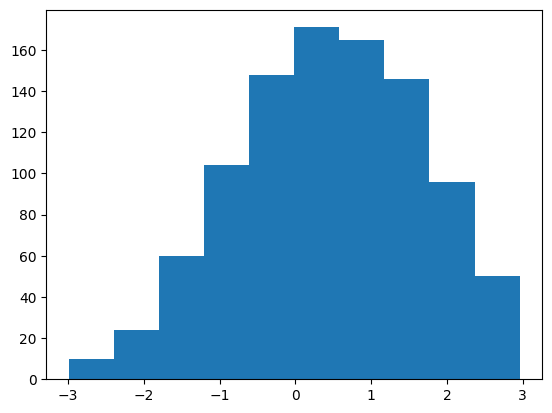

In [26]:
dist = np.random.normal(0.5, 1.3, 1000)
dist = dist[np.abs(dist) < 3]
plt.hist(dist); # Just for illustration

draw samples from a bionomial distribution with n=10, p=0.5 and shape (20, 3, 4)

In [27]:
np.random.binomial(n=10, p=0.5, size=(20, 3, 4))

array([[[ 7,  4,  6,  4],
        [ 6,  9,  2,  7],
        [ 5,  8,  5,  7]],

       [[ 3,  4,  3,  8],
        [ 6,  7,  7,  3],
        [ 5,  3,  4,  4]],

       [[ 5,  4,  3,  3],
        [ 3,  8,  6,  8],
        [ 5,  4,  6,  4]],

       [[ 4,  4,  3,  4],
        [ 4,  6,  3,  4],
        [ 6,  3,  4,  7]],

       [[ 3,  3,  5,  4],
        [ 5,  6,  3,  5],
        [ 5,  3,  6,  4]],

       [[ 5,  3,  5,  4],
        [ 6,  3,  5,  5],
        [ 6,  5,  6,  6]],

       [[ 7,  4,  5,  7],
        [ 9,  7,  4,  4],
        [ 5,  6,  5,  5]],

       [[ 7,  4,  7,  5],
        [ 4,  5,  6,  3],
        [ 4,  8,  4,  5]],

       [[ 5,  5,  6,  4],
        [ 5,  4,  6,  3],
        [ 5,  4,  4,  4]],

       [[ 4,  6,  4,  7],
        [ 8,  5,  3,  4],
        [ 6,  4,  3,  5]],

       [[ 7,  6,  4,  6],
        [ 4,  4,  7,  4],
        [ 4,  0,  7,  6]],

       [[ 6,  6,  3,  5],
        [ 4,  3,  5,  7],
        [ 2,  4,  4,  4]],

       [[ 7,  5,  5,  6],
        [ 3,  

# More complex data

This dataset contains sample from three different plants.
Each sample has 4 attributes (floats), stored in X, and a class / plant index, stored in y.

The attributes in X are:
- sepal length in cm
- sepal width in cm
- petal length in cm
- petal width in cm

The classes in y refer to:
0: Iris-Setosa
1: Iris-Versicolour
2: Iris-Virginica

In [28]:
from sklearn.datasets import load_iris

X, y = load_iris(as_frame=False, return_X_y=True)

Describe the data.

Start with counting the number of samples per class (plant index).

In [29]:
X.shape

(150, 4)

In [30]:
np.unique(y, return_counts=True)

(array([0, 1, 2]), array([50, 50, 50], dtype=int64))

Summarize the distributions of all 3 classes, e.g. compute means etc.

In [31]:
for i in range(3):
    print(i)
    print(np.mean(X[y==i, :], axis=0))
    print(np.std(X[y==i, :], axis=0))
    print()

0
[5.006 3.428 1.462 0.246]
[0.34894699 0.37525458 0.17191859 0.10432641]

1
[5.936 2.77  4.26  1.326]
[0.51098337 0.31064449 0.46518813 0.19576517]

2
[6.588 2.974 5.552 2.026]
[0.62948868 0.31925538 0.54634787 0.27188968]



# Advanced

Define a function that generates an array of unsigned integers between 0 and 10 of size=(50, 100), i.e. 50 rows and 100 columns.

In [32]:
# Enter code:
def sample_test_arr():
    test_arr = np.random.randint(0, 10, size=(50, 100), dtype=np.uint)
    return test_arr

Implement the following function that finds all rows in this array containing any number at least x times, where x is an integer parameter.
The array itself should also be a parameter.
The return value is an again a 2d array with same dtype, same number of rows, but with potentially fewer columns.

Test the function on the test_arr defined above.

For example, if x=3:
- [0, 1, 1, 2, 1, 3, 4] would be included.
- [0, 1, 2, 2, 1, 3, 1] would be included.
- [0, 1, 2, 2, 1, 3, 3] would not be included.

Make sure no error is raised and the returned shape and data-type is always correct.

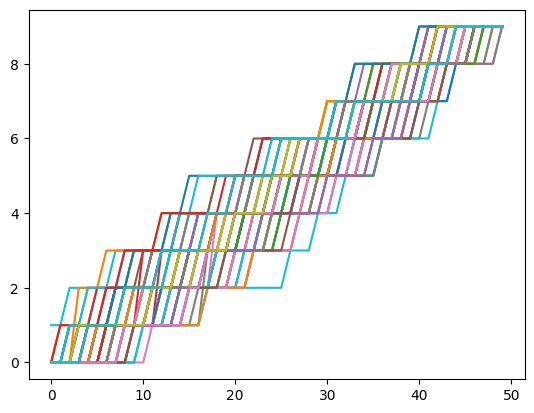

In [33]:
test_arr = sample_test_arr()
plt.plot(np.sort(test_arr, axis=0));

In [34]:
def find_all_rows_with_n_reps(arr: np.ndarray, x: int) -> np.ndarray:
    """Find all rows in 2d array where a single value is repeated at least x times, where x is given by the user.
    :param arr: 2d numpy array
    :param x: number of minimum counts of unique value per row
    :return: 2d numpy array, as arr, but with filtered rows
    """
    rows = []

    for row in arr:
        assert row.size == 100
        vs, cs = np.unique(row, return_counts=True)

        if cs.max() > x:
            rows.append(row)
    if len(rows) > 0:
        return np.vstack(rows)
    else:
        return np.zeros((0, 100), dtype=arr.dtype)

test_arr = sample_test_arr()
print(find_all_rows_with_n_reps(arr=test_arr, x=5).shape)
print(find_all_rows_with_n_reps(arr=test_arr, x=15).shape)
print(find_all_rows_with_n_reps(arr=test_arr, x=30).shape)

(50, 100)
(22, 100)
(0, 100)


Additional task:

- Write a doc-string for the function find_all_rows_with_n_reps.

Reimplement the function again, but now the repetitions must happen consecutively in each row.

For example, if x=3:
- [0, 1, 1, 2, 1, 3, 4] would be included.
- [0, 1, 2, 2, 1, 3, 1] would not be included.
- [0, 1, 2, 2, 1, 3, 3] would not be included.

Test the function on the test_arr defined above.

In [35]:
def find_maximum_length(row):
    diffs = np.abs(np.diff(row))
    diffs = np.append(1, diffs)
    diffs = np.append(diffs, 1)
    return np.max(np.abs(np.diff(np.where(diffs > 0)[0])))


def find_all_rows_with_n_consecutive_reps(arr, x):
    rows = []

    for row in arr:
        assert row.size == 100
        max_l = find_maximum_length(row)
        if max_l > x:
            rows.append(row)
    if len(rows) > 0:
        return np.vstack(rows)
    else:
        return np.zeros((0, 100), dtype=arr.dtype)


test_arr = sample_test_arr()
print(find_all_rows_with_n_consecutive_reps(arr=test_arr, x=1).shape)
print(find_all_rows_with_n_consecutive_reps(arr=test_arr, x=2).shape)
print(find_all_rows_with_n_consecutive_reps(arr=test_arr, x=3).shape)
print(find_all_rows_with_n_consecutive_reps(arr=test_arr, x=4).shape)

(50, 100)
(30, 100)
(2, 100)
(0, 100)


For x in {2, 4, 20}, compute the mean number of rows returned for both "find_all_rows_with_n_reps" and "find_all_rows_with_n_consecutive_reps".
Draw a new sample array each time you evaluate the number of rows.
Select an appropriate sample size.

In [36]:
res1 = dict()
res2 = dict()
for x in [2, 4, 20]:
    res1[x] = []
    res2[x] = []

    for i in range(200):
        test_arr = sample_test_arr()
        n1 = find_all_rows_with_n_reps(arr=test_arr, x=x).shape[0]
        n2 = find_all_rows_with_n_consecutive_reps(arr=test_arr, x=x).shape[0]
        res1[x].append(n1)
        res2[x].append(n2)

In [37]:
for res in [res1, res2]:
    for x, cs in res.items():
        print(x, np.mean(cs))
    print()

2 50.0
4 50.0
20 0.405

2 29.875
4 0.36
20 0.0

